In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage, compute_usage
%matplotlib inline
import datetime

In [2]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

sns.set_style('white')

In [3]:
## for males

In [4]:
## upload data frame females
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_all.parquet')
mdf_all = pd.read_parquet(path)
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [5]:
## filter out bad days - 
bad_session=[221, 228]
#bad_syllable=[44,89]
bad_syllable=[44]
#temp = mdf.loc[~mdf.index.isin(list(bad))]
mdf.drop(bad_session, level=0, axis=0, inplace=True)
mdf.drop(bad_syllable, axis=1, inplace=True)

In [ ]:
## plot everything for an individual

In [43]:
df_indv=mdf.groupby(['mouse','age']).mean()

<Axes: >

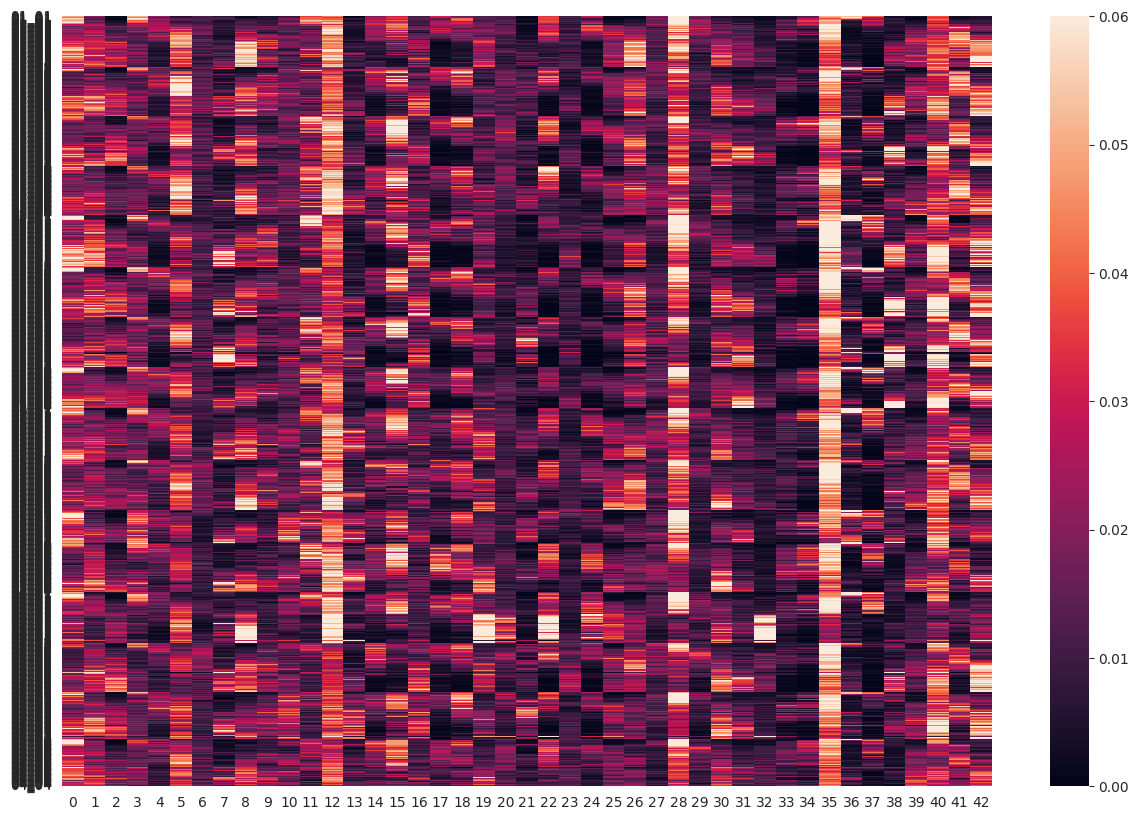

In [44]:
# syllbles by age males
data= df_indv.copy()
data_labels = data.index.get_level_values(0).to_numpy()
data= data.to_numpy()
fig, ax = plt.subplots()
fig.set_size_inches(15,10) 
sns.heatmap(data,vmax=0.06,yticklabels=data_labels)

/home/drl21/miniconda/envs/aging/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


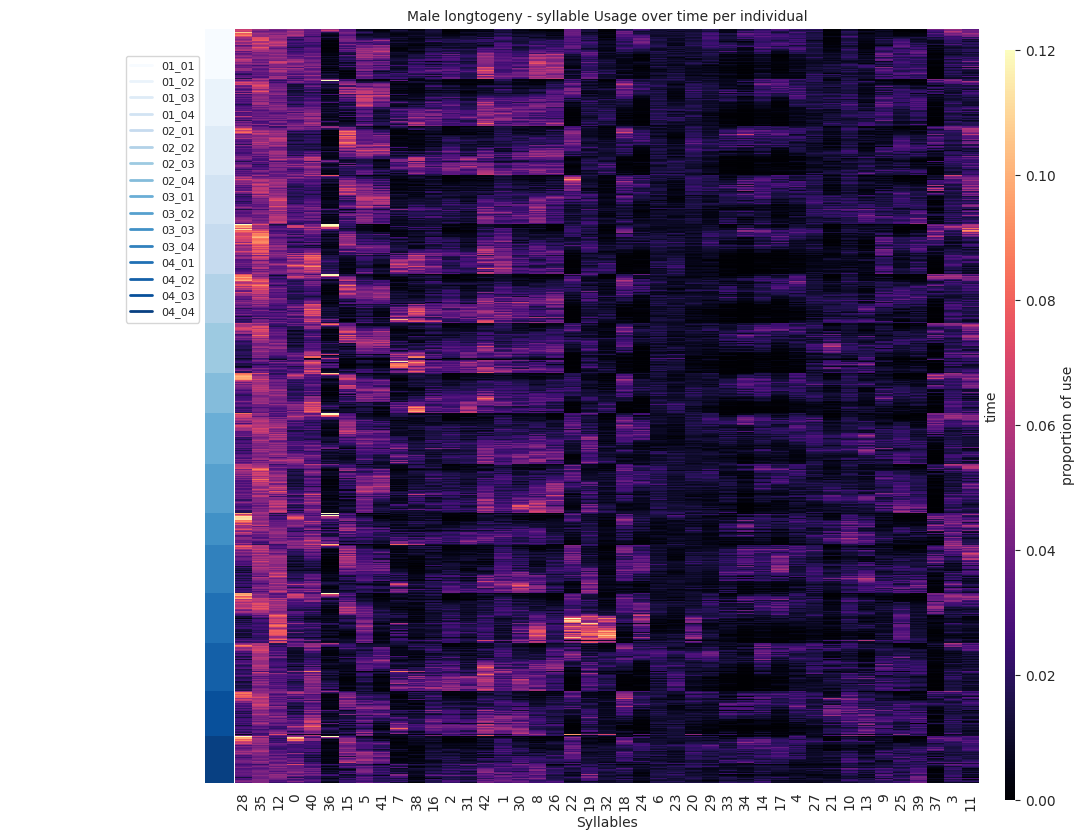

In [45]:
# plot Males
cmap2 = mpl.cm.Blues
ages = np.unique(data_labels)
colors = np.arange(0, 256, math.ceil(256/len(ages)))
seqmatcolor='magma'

# create age labels colors
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        #n=n+1
        #print(n)
        color_mat.append(cmap2(c))

# plot syllable usage acoss time points
cg=sns.clustermap(data=data,cmap=seqmatcolor, 
                   xticklabels=1,
                   figsize=(10, 10),
                   row_colors=color_mat,
                   #colors_ratio=0.02,
                   cbar_pos=(1.01, 0.025, 0.01, .75),
                   col_cluster=True,
                   row_cluster=None,
                   yticklabels=False,
                   #xticklabels=False,
                   method='average',metric='sqeuclidean',
                   cbar_kws={'label': 'proportion of use'}, 
                   vmax=0.12)
cg.ax_col_dendrogram.set_visible(False)
s=cg.dendrogram_col.reordered_ind #reordered columns of the matrix
ax = cg.ax_heatmap
ax.tick_params(left=False, bottom=False, right=False)

lines=[]
# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))

ax.set_xlabel('Syllables',fontsize=10)
ax.set_ylabel('time',fontsize=10)
ax.set_title('Male longtogeny - syllable Usage over time per individual', fontsize=10)
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(-80, 1),loc='upper right',fontsize=8)
plt.show()
#cg.savefig(data_loc +'ontogeny_syllable_Distribution.pdf', bbox_inches='tight')

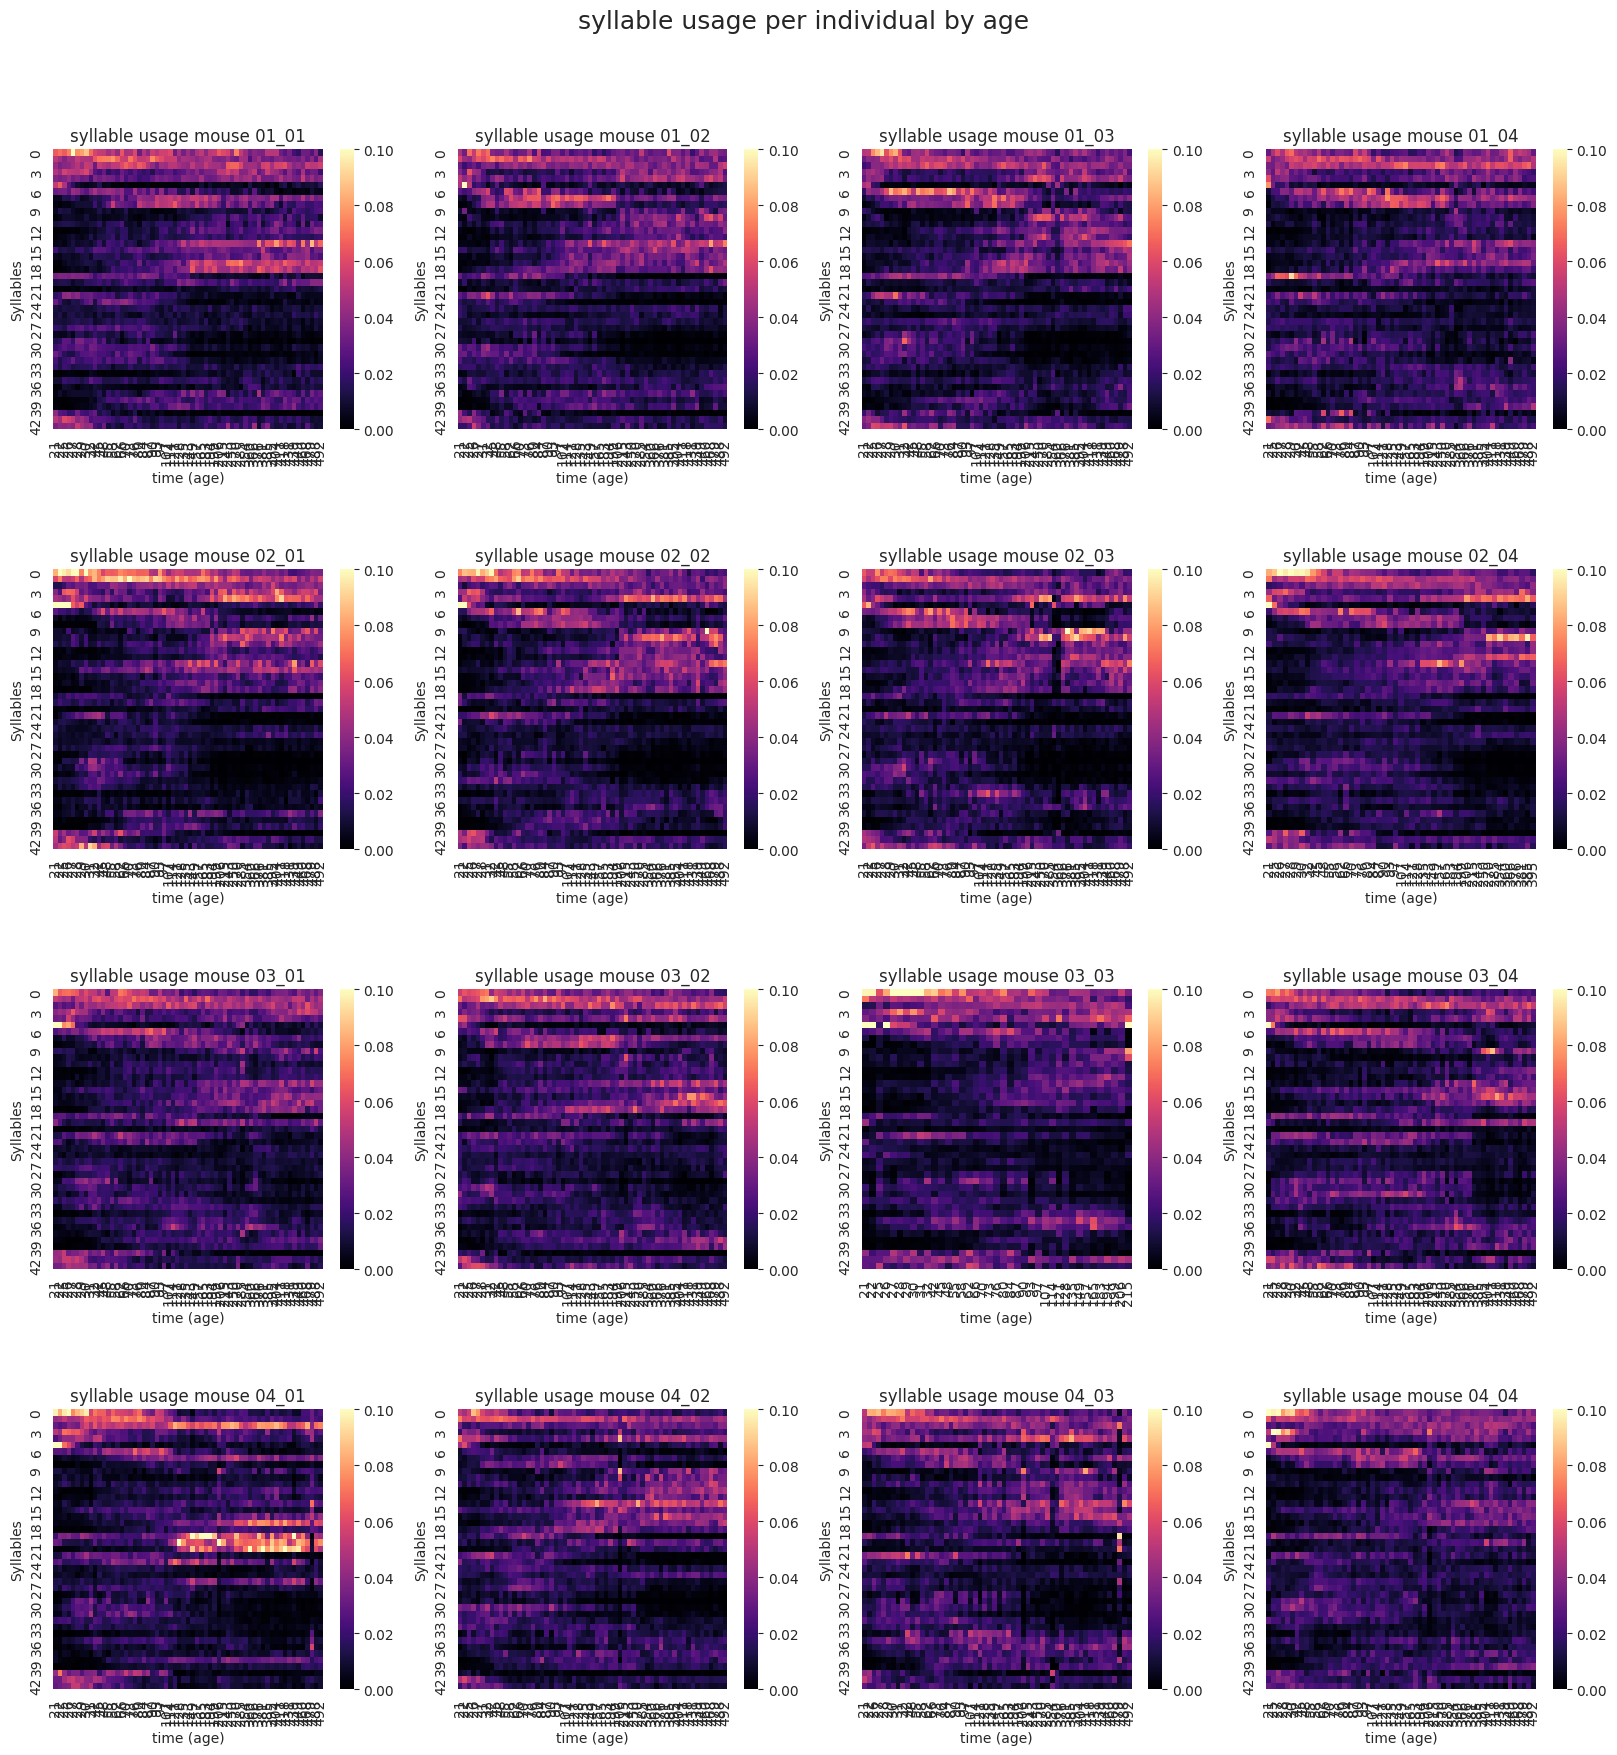

In [58]:
# for males
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("syllable usage per individual by age", fontsize=18, y=0.95)

n=0
for mouse,_df in enumerate(df_indv.groupby('mouse')):
    m=_df[0]
    ages = _df[1].index.get_level_values(1).to_numpy()
    data_temp = _df[1].to_numpy()[:,s]
    ax = plt.subplot(4, 4, n + 1)
    sns.heatmap(data_temp.T,cmap = 'magma',vmax=0.1, xticklabels= ages)
    ax.set_title('syllable usage mouse ' + str(m))
    ax.set_ylabel('Syllables',fontsize=10)
    ax.set_xlabel('time (age)',fontsize=10)
    #ax.set_ylim(0,0.12)
    #ax = plt.subplot(10, 7, n + 1)
    #sns.heatmap(kld_temp,ax=ax, vmax=1.0)
    n=n+1

In [59]:
## pca on individuals

In [62]:
pcs = PCA(n_components=2).fit_transform(np.log(df_indv + 1e-6))
mouse = df_indv.index.get_level_values(0)
pc_df = pd.DataFrame(pcs)
pc_df['mouse'] = mouse

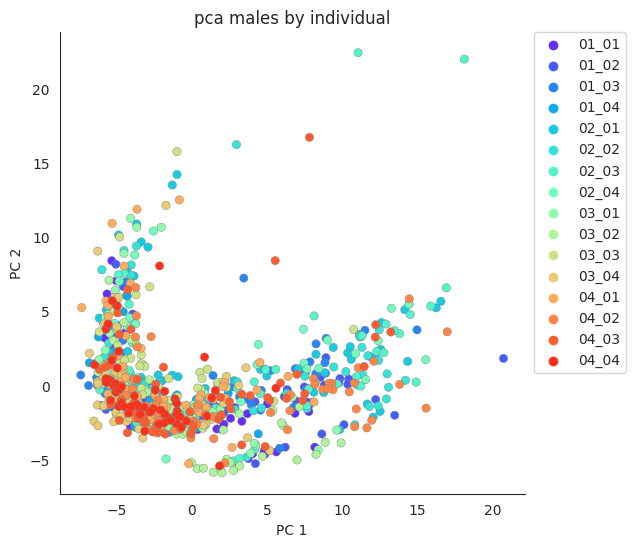

In [63]:
fig, ax = plt.subplots(figsize=(6, 6))
ec=sns.scatterplot(data=pc_df, x=pc_df[0], y=pc_df[1], 
                hue="mouse",
                palette="rainbow",
                #palette='rocket_r',
                #size="age",
                #style='age',
                sizes=(80, 20),
                edgecolor='gray',
                linewidth=0.3, 
                #alpha = 0.7,
                legend='full',
               )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.legend(frameon=False)
plt.title("pca males by individual")
sns.despine()

In [ ]:
## umap individuals